## VIX Index

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


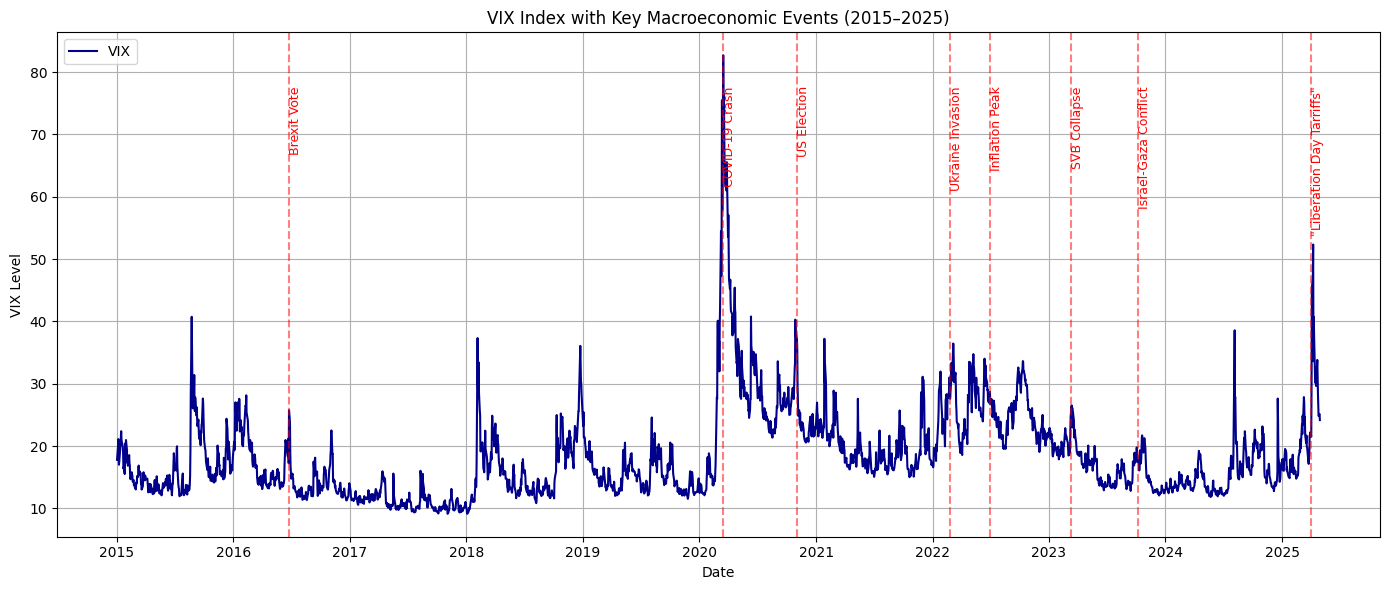

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Download actual VIX data
vix = yf.download("^VIX", start="2015-01-01", end="2025-04-30")

# Plot VIX with annotations
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(vix.index, vix['Close'], label='VIX', color='darkblue')

events = {
    "Brexit Vote": "2016-06-23",
    "COVID-19 Crash": "2020-03-16",
    "US Election": "2020-11-03",
    "SVB Collapse": "2023-03-10",
    "Inflation Peak": "2022-06-30",
    "Ukraine Invasion": "2022-02-24",
    "Israel-Gaza Conflict": "2023-10-07",
    '"Liberation Day Tarriffs"': "2025-03-31"
}

for label, date in events.items():
    ax.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.5)
    ax.text(pd.to_datetime(date), ax.get_ylim()[1]*0.9, label, rotation=90,
            verticalalignment='top', fontsize=9, color='red')

ax.set_title("VIX Index with Key Macroeconomic Events (2015–2025)")
ax.set_ylabel("VIX Level")
ax.set_xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.savefig("vix_chart.png", dpi=300, bbox_inches="tight")
plt.show()
# Save as PNG


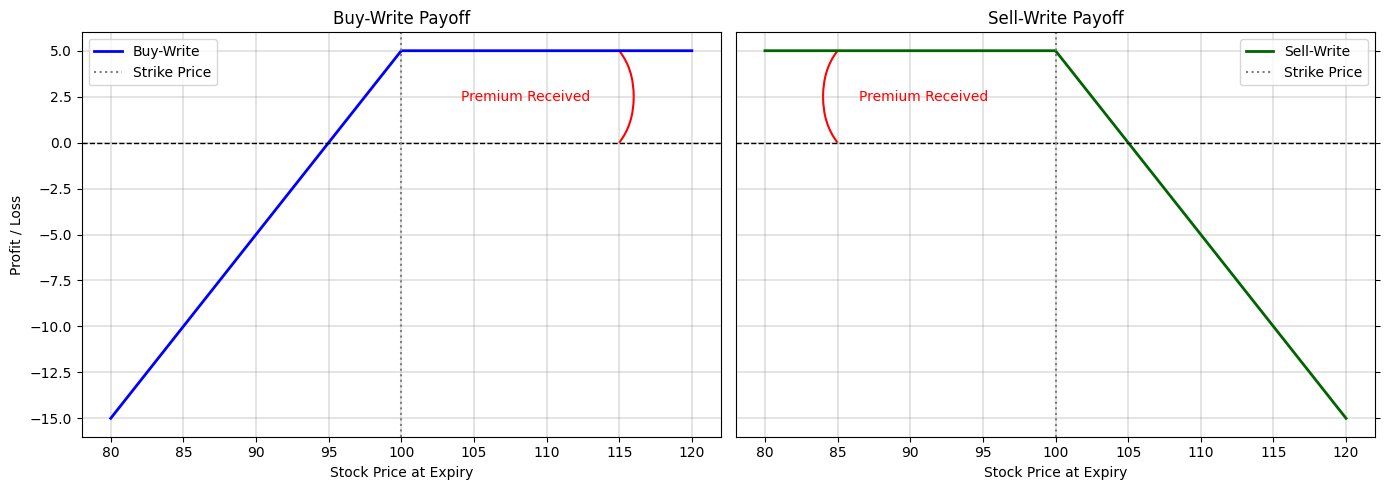

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Parameters
S = np.linspace(80, 120, 500)
strike = 100
premium = 5

# Payoff definitions
stock_payoff = S - strike
call_payoff = -np.maximum(S - strike, 0) + premium
buy_write = stock_payoff + call_payoff

short_stock = -(S - strike)
short_put = -np.maximum(strike - S, 0) + premium
sell_write = short_stock + short_put

# Function to draw a brace
def draw_brace(ax, x, y0, y1, side='right', text='', color='red', text_side='opposite'):
    if side == 'right':
        verts = [
            (x, y0), (x + 1, y0 + 1), (x + 1, (y0 + y1) / 2), 
            (x + 1, y1 - 1), (x, y1)
        ]
    else:
        verts = [
            (x, y0), (x - 1, y0 + 1), (x - 1, (y0 + y1) / 2), 
            (x - 1, y1 - 1), (x, y1)
        ]
    codes = [Path.MOVETO] + [Path.CURVE3] * (len(verts) - 1)
    path = Path(verts, codes)
    patch = PathPatch(path, facecolor='none', lw=1.5, edgecolor=color)
    ax.add_patch(patch)

    text_x = x - 2.0 if side == 'right' else x + 1.5
    ha = 'right' if side == 'right' else 'left'
    ax.text(text_x, (y0 + y1) / 2, text, va='center', ha=ha, color=color)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# --- Buy-Write Plot
axes[0].plot(S, buy_write, label="Buy-Write", color="blue", lw=2)
axes[0].axhline(0, color='black', linestyle='--', lw=1)
axes[0].axvline(strike, color='grey', linestyle=':', label='Strike Price')
axes[0].set_title("Buy-Write Payoff")
axes[0].set_xlabel("Stock Price at Expiry")
axes[0].set_ylabel("Profit / Loss")
axes[0].legend()
axes[0].grid(True, color='gray', linestyle='-', linewidth=0.3)
draw_brace(axes[0], 115, 0, premium, side='right', text='Premium Received', color='red')

# --- Sell-Write Plot
axes[1].plot(S, sell_write, label="Sell-Write", color="darkgreen", lw=2)
axes[1].axhline(0, color='black', linestyle='--', lw=1)
axes[1].axvline(strike, color='grey', linestyle=':', label='Strike Price')
axes[1].set_title("Sell-Write Payoff")
axes[1].set_xlabel("Stock Price at Expiry")
axes[1].legend()
axes[1].grid(True, color='gray', linestyle='-', linewidth=0.3)
draw_brace(axes[1], 85, 0, premium, side='left', text='Premium Received', color='red')

# Move y-axis to right for Sell-Write plot
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
axes[1].set_ylabel("")

plt.tight_layout()
plt.savefig("hockey_sticks.png", dpi=300, bbox_inches="tight")
plt.show()


In [3]:
%run ../py/createVolDf.py
correl_df = createCorrelDf(lookback_days=60)  # or your desired window
correl_df.head()

✅ Saved correlation matrix over trailing 60 days.


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
A,1.000000,0.842811,0.648692,0.743147,0.450836,0.588452,0.748515,0.603308,0.857426,0.503145,...,0.492141,0.720186,0.786980,0.397383,0.699545,0.809738,0.521098,0.404545,0.849016,0.731992
AAPL,0.842811,1.000000,0.566522,0.819207,0.441880,0.622127,0.738627,0.665204,0.853584,0.580726,...,0.554007,0.748345,0.877351,0.388399,0.719374,0.873745,0.556828,0.321409,0.852690,0.786390
ABBV,0.648692,0.566522,1.000000,0.438876,0.549255,0.465780,0.485136,0.316828,0.532949,0.563421,...,0.419992,0.582153,0.469991,0.551781,0.558253,0.525043,0.636462,0.596978,0.522751,0.726757
ABNB,0.743147,0.819207,0.438876,1.000000,0.393370,0.556995,0.750069,0.748134,0.870085,0.362198,...,0.439587,0.702510,0.829312,0.308816,0.606358,0.822365,0.437199,0.200635,0.811344,0.718797
ABT,0.450836,0.441880,0.549255,0.393370,1.000000,0.606437,0.417542,0.207630,0.452142,0.648197,...,0.542560,0.510550,0.341854,0.553089,0.513126,0.516735,0.504028,0.501492,0.347395,0.675499


C:\Users\glade\AppData\Local\Temp\ipykernel_24224\2905171475.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = cm.get_cmap('tab20', 11).colors


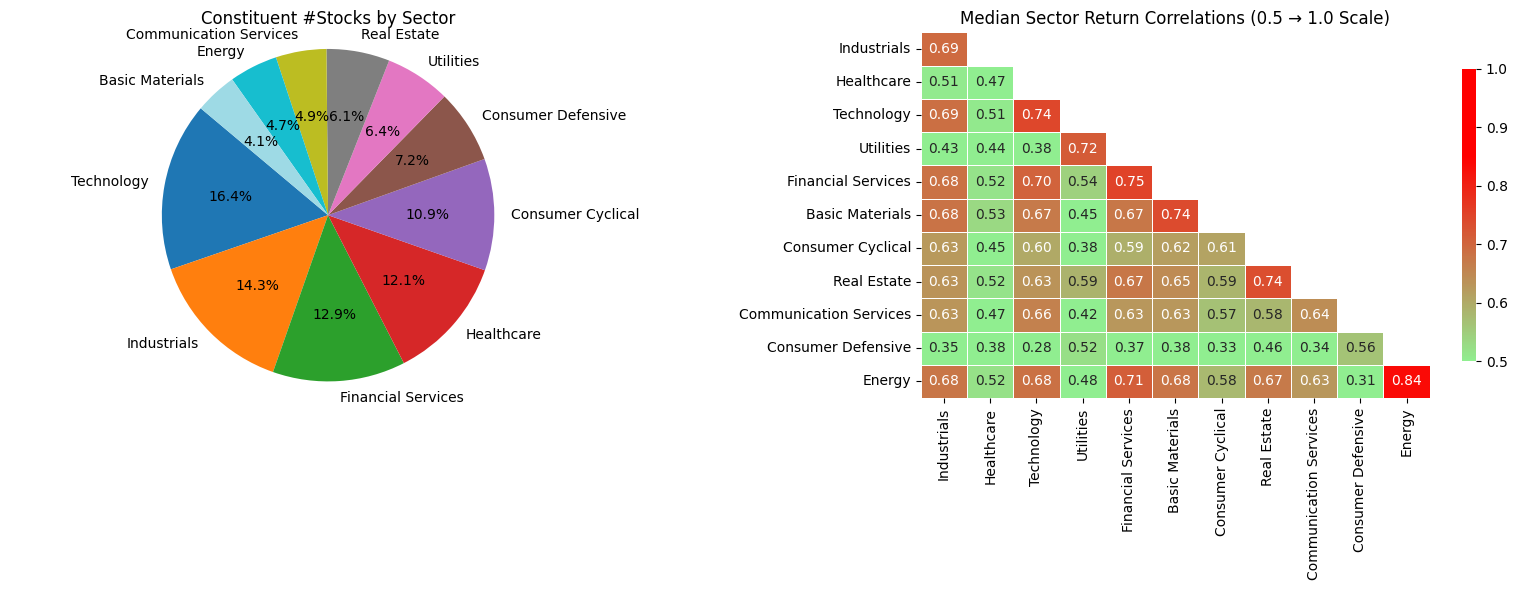

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load correlation matrix (already created via createCorrelDf)
correl_df = pd.read_csv("correlation_matrix.csv", index_col=0)

# Load sector map from JSON
sector_output_path = "../data/sector_map.json"
with open(sector_output_path, "r") as f:
    sector_data = json.load(f)

# Create a Series from the JSON mapping
sector_map = pd.Series(sector_data, name="Sector")

# Filter to tickers present in the correlation matrix
sector_map = sector_map[sector_map.index.isin(correl_df.columns)]
correl_df = correl_df.loc[sector_map.index, sector_map.index]

# Pie chart: distribution of tickers by sector
sector_counts = sector_map.value_counts()

# Sector-level median correlations
sectors = sector_map.unique().tolist()
sector_corrs = pd.DataFrame(index=sectors, columns=sectors, dtype=float)

for s1 in sectors:
    for s2 in sectors:
        tickers1 = sector_map[sector_map == s1].index
        tickers2 = sector_map[sector_map == s2].index
        values = correl_df.loc[tickers1, tickers2].values.flatten()
        values = values[~pd.isna(values)]
        if len(values) > 0:
            sector_corrs.loc[s1, s2] = np.median(values)

# Plot pie + heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

from matplotlib import cm

# Get 11 distinct colors from tab20
color_palette = cm.get_cmap('tab20', 11).colors

# Pie chart with explicit colors
axes[0].pie(
    sector_counts,
    labels=sector_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=color_palette
)
axes[0].axis('equal')
axes[0].set_title('Constituent #Stocks by Sector')

from matplotlib.colors import LinearSegmentedColormap

# Create custom colormap from green (0.5) to red (1.0)
colors = [(0.0, 'lightgreen'), (0.7, 'red'), (1.0, 'red')]
cmap = LinearSegmentedColormap.from_list("green_to_red", colors)
mask = np.triu(np.ones_like(sector_corrs, dtype=bool), k=1)
# Heatmap with custom normalization
sns.heatmap(
    sector_corrs.astype(float),
    mask=mask,
    cmap=cmap,
    vmin=0.5, vmax=1.0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    ax=axes[1]
)
axes[1].set_title('Median Sector Return Correlations (0.5 → 1.0 Scale)')
plt.tight_layout()
plt.savefig("correlation.png", dpi=300, bbox_inches="tight")
plt.show()
